Este é um estudo de caso referente ao curso do Certificado Profissional de Análise de Dados do Google.

# Cenário

A Furia é um time brasileiro de Esporte eletrônico ou eSports, que são competições organizadas de jogos digitais.

A organização Furia fez mudanças em sua equipe, na modalidade de CSGO, alterando dois jogadores na equipe para o ano de 2022.

É necessário visualizar o desempenho dos novos jogadores e de toda equipe em conjunto.

A partir das percepções obtidas com a análise, será realizada uma comparação entre o desempenho da equipe atual com a equipe de 2020, que teve grande sucesso alcançando o top 3 no ranking mundial. No entanto, para realizar essa análise, será necessário extrair dados do site hltv.org

* hltv: site informações voltadas a modalidade de CSGO

# Perguntar

Uma das perguntas feitas para guiar o futuro da análise foi: Os jogadores novos e toda a equipe atual, desempenham estatisticamente melhor que o time de 2020?

Portanto, o objetivo desse estudo de caso é apontar as diferenças entre o início das formações de 2020 e 2022 da Furia na modalidade de CSGO, levanto como referencia os 16 primeiros jogos das duas equipes.

* Formação 2020: yuurih, KASCERATO, arT, HEN1, VINI.
* Formação 2022: yuurih, KASCERATO, arT, saffe, drop.

Os principais interessados na resolução do estudo são:

* CEO Furia 
* Comunidade brasileira de CSGO

Os *insights* que serão obtidos através da análise serão responsáveis por auxiliar na comparação entre as duas formações. 

# Preparar

Para responder qual time teve o melhor desempenho inicial, serão utilizados dados dos 16 primeiros jogos das equipes de 2020 e 2022.

Os dados utilizados são públicos e estão disponíveis no site htlv.org.

Os dados foram organizados em planilhas no Google Sheet, em arquivos .csv, sendo dados de seus respectivos jogos.

Não há problemas de parcialidade ou credibilidade nos dados, os dados são referentes a estatisticas criadas pelo próprio jogo, e são expostas no site. Os dados são abrangentes, porque contém todas as informações necessárias para responder à pergunta, uma vez que contém dados estatisticos dos times e jogadores do cenário mundial de CSGO, portanto é possível afirmar que  os dados são confiaveis.


# Processar

In [1]:
#Instalando pacotes utilizados.
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("cowplot")
install.packages("dplyr")
install.packages("tidyr")



#Carregando pacotes.
library(tidyverse)
library(ggplot2)
library(cowplot)
library(dplyr)
library(tidyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘rlang’


Warning message in install.packages("dplyr"):
“installation of package ‘rlang’ had non-zero exit status”
Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks st

In [2]:
#Carregando database player_stats
library(readr)
player_stats <- read_csv("../input/informaes-jogadores-csgo-2020/player_stats.csv")
#Visualizando database 
View(player_stats)

New names:
* `` -> ...1

Rows: 1869 Columns: 9

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): name, country, teams
dbl (6): ...1, total_maps, total_rounds, kd_diff, kd, rating


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



...1,name,country,teams,total_maps,total_rounds,kd_diff,kd,rating
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,ZywOo,France,"['Vitality', 'aAa']",854,22399,5248,1.38,1.28
1,s1mple,Ukraine,"['Natus Vincere', 'FlipSid3']",1429,37717,8070,1.33,1.25
2,deko,Russia,['1WIN'],190,5096,1250,1.42,1.24
3,saffee,Brazil,['paiN'],202,5383,1211,1.37,1.24
4,sh1ro,Russia,"['Gambit', 'Gambit Youngsters']",744,19780,4593,1.43,1.22
5,m0NESY,Russia,['NAVI Junior'],144,3687,709,1.31,1.21
6,Kaze,Malaysia,"['ViCi', 'Flash', 'MVP.karnal']",784,20459,3900,1.32,1.20
7,degster,Russia,"['Spirit', 'Spirit', 'Espada']",555,14868,2745,1.31,1.19
8,sterling,New Zealand,"['AVANT', 'Dire Wolves', 'Grayhound', 'Legacy', 'Chiefs']",702,18010,3532,1.33,1.19


Abaixo estão as tabelas contendo os dados de cada jogador das duas formações.

In [3]:
#Filtrando dados player_stats
players_furia_2020<- player_stats %>%
  filter(teams == "['FURIA']" | name== "HEN1") %>%
  summarize(name, country, teams, total_maps, total_rounds, kd, rating)
#Visualizando database
View(players_furia_2020)


name,country,teams,total_maps,total_rounds,kd,rating
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
KSCERATO,Brazil,['FURIA'],806,20993,1.28,1.15
yuurih,Brazil,['FURIA'],898,23462,1.19,1.12
HEN1,Brazil,"['Immortals', 'FURIA', 'Luminosity']",1020,26519,1.22,1.10
arT,Brazil,['FURIA'],884,22981,1.02,1.02
VINI,Brazil,['FURIA'],879,22908,0.99,0.99


In [4]:
#Carregando database player2022stats
library(readr)
furia_players_2022 <- read_csv("../input/players-furia-2022/players2022stats.csv")
#Visualizando database
View(furia_players_2022)

Rows: 5 Columns: 7

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): name, country, teams
dbl (4): total_maps, total_rounds, kd, rating


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



name,country,teams,total_maps,total_rounds,kd,rating
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
arT,Brazil,FURIA,937,24307,1.01,1.10
KSCERATO,Brazil,FURIA,859,22319,1.28,1.19
yuurih,Brazil,FURIA,951,24788,1.19,1.18
saffe,Brazil,FURIA,333,8819,1.35,1.26
drop,Brazil,FURIA,107,2765,0.99,1.00


Tabelas de resumo dos dados das formações.

In [5]:
#Carregando database FURIA2020
library(readr)
FURIA2020 <- read_csv("../input/furia-2020/FURIA2020.csv")
#Visualizando database
View(FURIA2020)

Rows: 1 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): nome, country, best_map
dbl (5): kd_ratio, 2month_rank, count_games, win, lose


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



nome,country,kd_ratio,2month_rank,best_map,count_games,win,lose
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
FURIA,Brazil,1.09,13,mirage,16,9,7


In [6]:
#Carregando database FURIA2022
library(readr)
FURIA2022 <- read_csv("../input/furia-2022/FURIA2022.csv")
#Visualizando database
View(FURIA2022)


Rows: 1 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): nome, country, best_map2022
dbl (5): kd_ratio, 2month_rank, count_games, win, lose


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



nome,country,kd_ratio,2month_rank,best_map2022,count_games,win,lose
<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
FURIA,Brazil,0.95,14,Ancient,16,7,9


A tabela abaixo foi criada no Google Sheets, utilizando os dados do site hltv.org, e contém os dados das partidas de ambas as formações.

In [7]:
#Carregando database MapasFuria
library(readr)
mapasfuria <- read_csv("../input/mapas-furia/MapasFuria.csv")

#Visualizando dados
View(mapasfuria)


Rows: 32 Columns: 11

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Nome, Oponente, resultado, lineup, best_rating
dbl (6): team_rating, first_kills, clutchs_won, most_kill, most_assists, num...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Nome,Oponente,resultado,lineup,team_rating,first_kills,clutchs_won,most_kill,most_assists,best_rating,num_jogo
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
Nuke,Wisla Krakow,L,atual_lineup,0.81,10,0,17,4,01.01,1
Inferno,Wisla Krakow,L,atual_lineup,0.90,10,3,21,10,1.13,2
Nuke,ORDER,W,atual_lineup,1.42,16,1,23,7,1.88,3
Ancient,HEET,W,atual_lineup,1.29,17,1,22,7,1.52,4
Mirage,9z,L,atual_lineup,0.87,7,1,22,6,1.11,5
Ancient,9z,W,atual_lineup,1.00,14,1,26,6,1.22,6
Nuke,9z,W,atual_lineup,1.08,14,1,22,5,1.20,7
Inferno,Virtus.pro,L,atual_lineup,0.72,8,0,11,3,0.81,8
Overpass,Virtus.pro,L,atual_lineup,0.70,10,0,13,3,0.86,9


Tabela de mapas após ser excluida a coluna "lineup" e adicionada uma nova coluna chamada "formacao". 

In [8]:
#Alterando tabela

mapas_furia <- mapasfuria %>%
  mutate(formacao = recode(lineup,"atual_lineup" = "FURIA 2022","best_lineup" = "FURIA 2020")) 

mapas_furia$lineup <- NULL

#Visualizando dados
View(mapas_furia)

Nome,Oponente,resultado,team_rating,first_kills,clutchs_won,most_kill,most_assists,best_rating,num_jogo,formacao
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
Nuke,Wisla Krakow,L,0.81,10,0,17,4,01.01,1,FURIA 2022
Inferno,Wisla Krakow,L,0.90,10,3,21,10,1.13,2,FURIA 2022
Nuke,ORDER,W,1.42,16,1,23,7,1.88,3,FURIA 2022
Ancient,HEET,W,1.29,17,1,22,7,1.52,4,FURIA 2022
Mirage,9z,L,0.87,7,1,22,6,1.11,5,FURIA 2022
Ancient,9z,W,1.00,14,1,26,6,1.22,6,FURIA 2022
Nuke,9z,W,1.08,14,1,22,5,1.20,7,FURIA 2022
Inferno,Virtus.pro,L,0.72,8,0,11,3,0.81,8,FURIA 2022
Overpass,Virtus.pro,L,0.70,10,0,13,3,0.86,9,FURIA 2022


# Compartilhar
Foram analisadas as duas formações da Furia, tanto individualmente quanto como equipe.

A diferença no desempenho das duas formações nos 16 jogos analisados é baixa.

A Furia 2022 leva vantagem em relação ao desempenho.

Os mapas análisados tem menos impacto na análise, mas demonstram que o estilo de jogo da equipe mudou e favoreceu os 5 jogadores.

Apesar da formação de 2022 ter vencido menos partidas e oscilado mais que a formação de 2020, os jogadores da Furia atual tem uma média de desempenho superior nas partidas, tanto no individual quanto coletivo, e além disso a equipe atual esteve em um menor número de situações de desvantagem durante os jogos se comparado a equipe anterior, indicando melhoria de performance.




## Visualizações

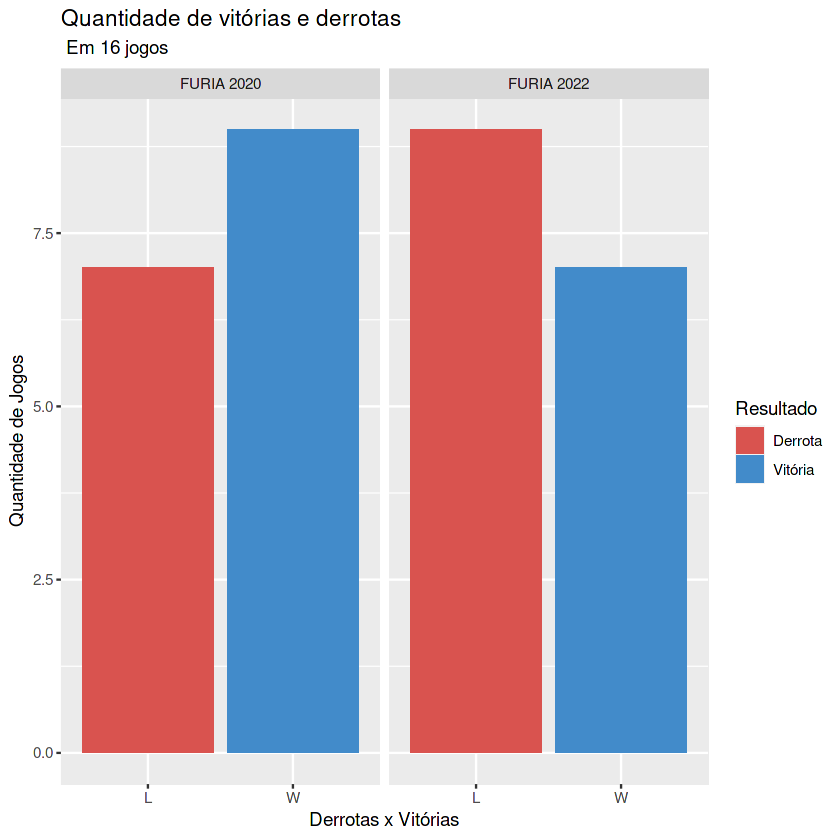

In [9]:
#FURIA COMPARAÇÃO TOTAL DE VITORIAS 2022 X 2020
ggplot(data = mapas_furia) +
  geom_bar(mapping = aes(x = resultado, fill = resultado))+
  facet_wrap(~formacao) +
  scale_fill_manual(name = "Resultado",
                    labels = c("Derrota", "Vitória"),
                    values = c("#d9534f", "#428bca")) +
  labs(subtitle = " Em 16 jogos",title = "Quantidade de vitórias e derrotas", x= "Derrotas x Vitórias", y="Quantidade de Jogos")

Em 16 jogos a equipe atual venceu 7 e perdeu 9, e a equipe de 2020 com a mesma quantidade de partidas fez o inverso, vencendo 9 e perdendo 7.

O gráfico de barras abaixo mostra que em 16 jogos, o melhor mapa da formação de 2020 e 2022 respectivamente é Mirage e Ancient, o que indica mudanças nos estilo de jogo para o ano atual.

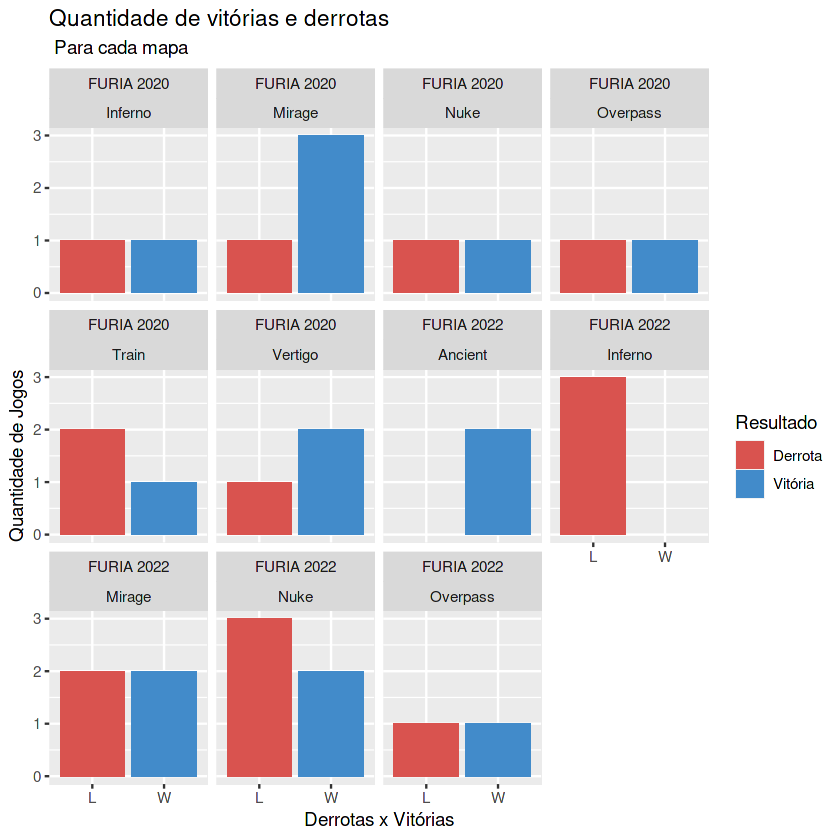

In [10]:
#FURIA 2020 X FURIA 2022 (VITÓRIA/DERROTA)
ggplot(data = mapas_furia) +
  geom_bar(mapping = aes(x = resultado, fill = resultado))+
  facet_wrap(~formacao~Nome) +
  labs(title = "FURIA 2020 x MAPAS x FURIA 2022", x= "Resultado", y="Quantidade de Jogos")+
  scale_fill_manual(name = "Resultado",
                    labels = c("Derrota", "Vitória"),
                    values = c("#d9534f", "#428bca")) +
  labs(subtitle = " Para cada mapa",title = "Quantidade de vitórias e derrotas", x= "Derrotas x Vitórias", y="Quantidade de Jogos")

O time de 2022 desempenha mais em melhores de 1, enquanto o time de 2020 em melhores de 3.  

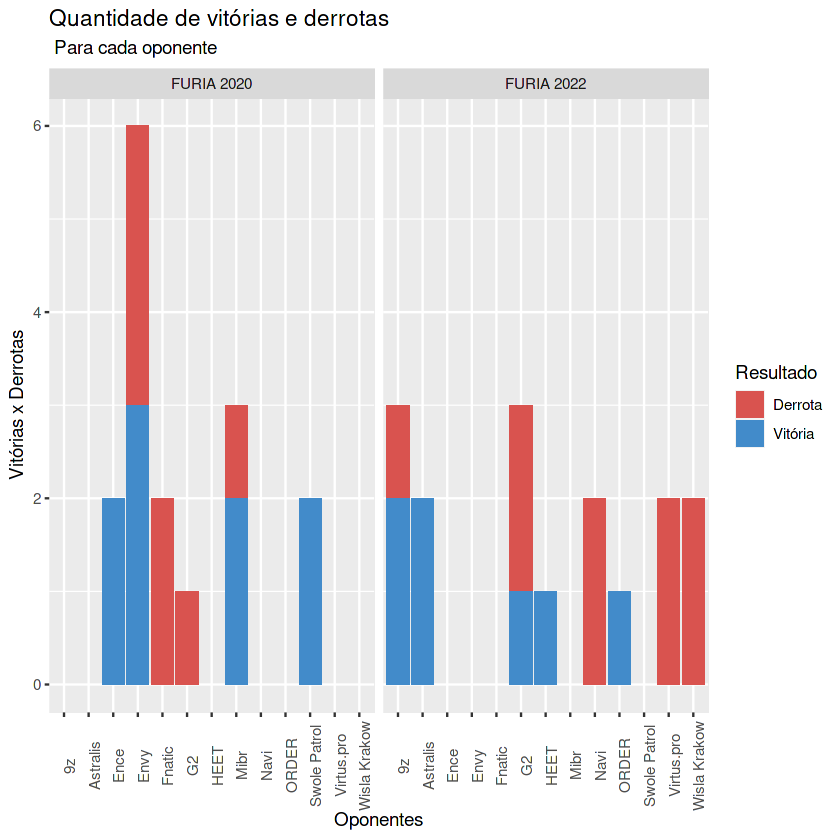

In [11]:
#FURIA COMPARAÇÃO TOTAL DE VITORIAS PARA CADA OPONENTE 2022 X 2020
ggplot(data = mapas_furia) + 
  geom_bar(mapping = aes(x =Oponente ,  fill= resultado))+
  facet_wrap(~formacao)+
  scale_fill_manual(name = "Resultado",
                    labels = c("Derrota", "Vitória"),
                    values = c("#d9534f", "#428bca")) +
  labs(subtitle = " Para cada oponente",title = "Quantidade de vitórias e derrotas", x= "Oponentes", y="Vitórias x Derrotas") +
  theme(axis.text.x=element_text(angle = 90))

O gráfico abaixo é bastante importante para a análise, ele irá abordar uma variável nova utilizada, chamada rating, que nada mais é do que o desempenho, e quanto maior o numero melhor.
Com as linhas é possivel perceber que a equipe de 2022 oscila mais em questao de desempenho.

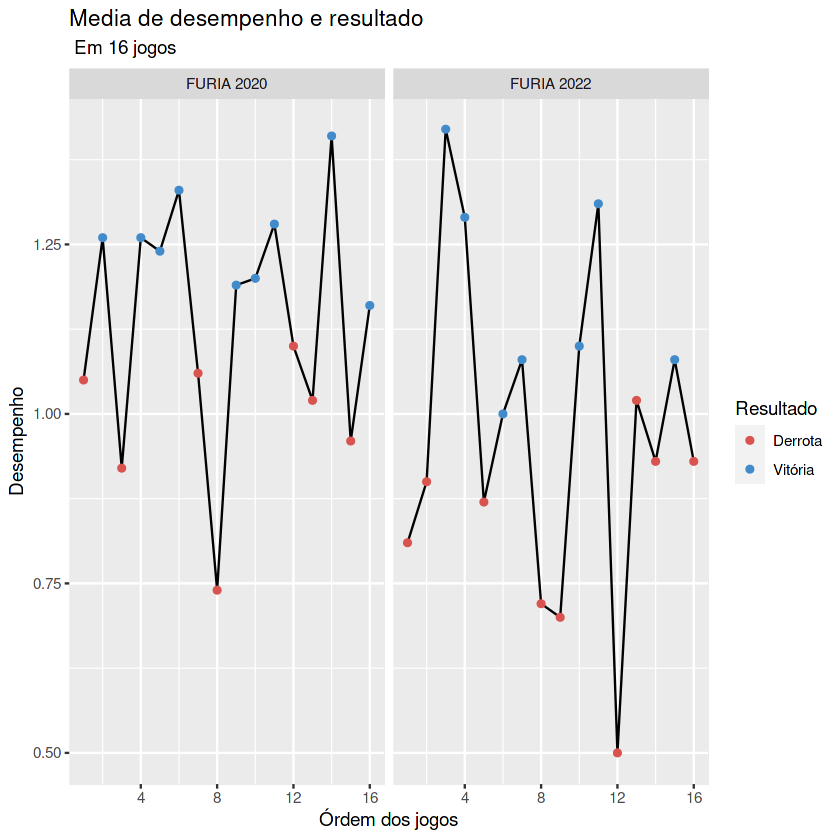

In [12]:
#FURIA TEAM DESEMPENHO X RESULTADO(VITÓRIA/DERROTA)  2022 X 2020 = PONTO + LINHAS
ggplot(data = mapas_furia) + 
  geom_line(mapping = aes(x =num_jogo ,y =team_rating ))+
  geom_point(mapping = aes(x =num_jogo ,y =team_rating, color = resultado))+
  facet_wrap(~formacao)+
  scale_color_manual(name = "Resultado",
                     labels = c("Derrota", "Vitória"),
                     values = c("#d9534f", "#428bca")) +
  labs(title = "Media de desempenho e resultado",subtitle = " Em 16 jogos", y="Desempenho", x="Órdem dos jogos")

O próximo gráfico trará mais variáveis que impactam no resultado dos jogos, sendo ela o clutch.
Cada partida é dividida em rounds, e vencer um clutch significa vencer uma situação de desvantagem, um round em desvantagem.
Em 16 jogos a formação de 2020 se encontrou em mais situações de desvantagens do que a atual.

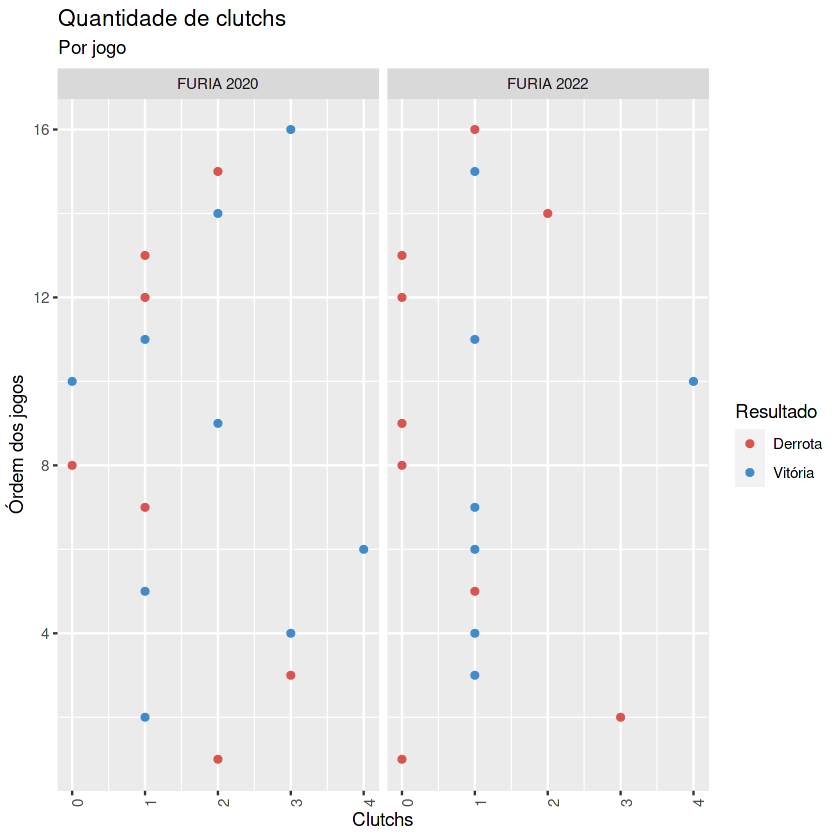

In [13]:
#FURIA TEAM CLUTCH X RESULTADO(VITÓRIA/DERROTA)  2022 X 2020 
ggplot(data = mapas_furia) + 
  geom_point(mapping = aes(x =clutchs_won,y =num_jogo, color = resultado))+
  facet_wrap(~formacao)+
  scale_color_manual(name = "Resultado",
                     labels = c("Derrota", "Vitória"),
                     values = c("#d9534f", "#428bca")) +
  labs(title = "Quantidade de clutchs",subtitle = "Por jogo",x="Clutchs", y="Órdem dos jogos")+
  theme(axis.text.x=element_text(angle = 90))

As cores do gráfico de pontos correspondem com a posição dos jogadores, e atualmente o desempenho individual de cada um deles é superior quandos comparados com a formação de 2020.

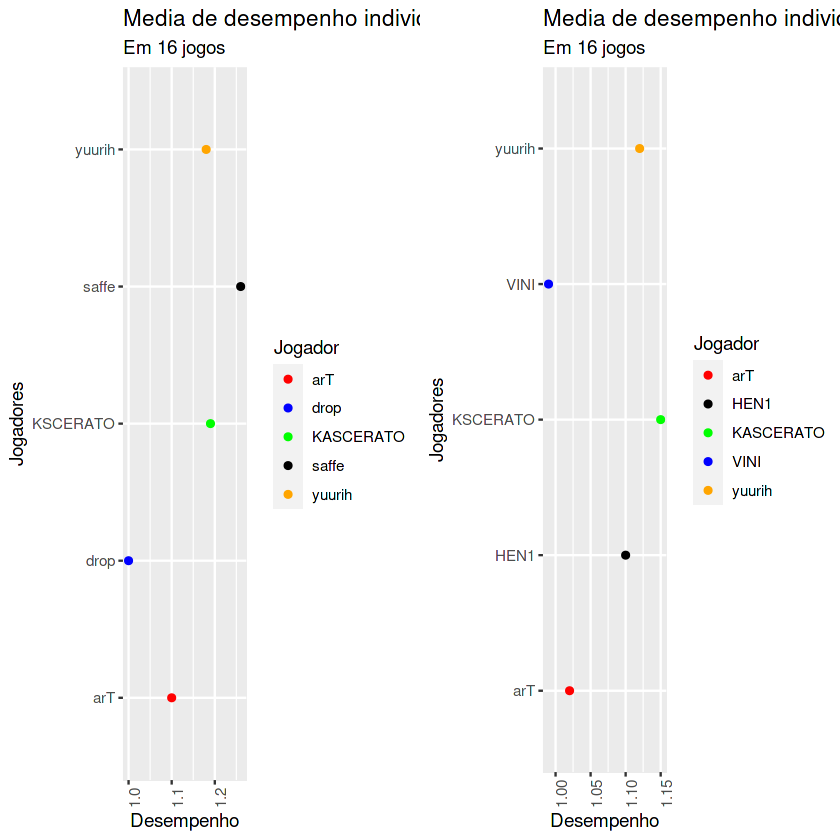

In [14]:
#MEDIA DE DESEMPENHO PLAYERS FURIA 2022

PF2022<-ggplot(data = furia_players_2022) + 
  geom_point(mapping = aes(y=name,x =rating, color = name))+
  labs(title = "Media de desempenho individual", subtitle = "Em 16 jogos",y="Jogadores", x="Desempenho")+
  scale_color_manual(name = "Jogador",
                     labels = c("arT", "drop", "KASCERATO","saffe","yuurih"),
                     values = c("red", "blue","green","black","orange")) +
  theme(axis.text.x=element_text(angle = 90))


#MEDIA DE DESEMPENHO FURIA 2020
PF2020<-ggplot(data =players_furia_2020) + 
  geom_point(mapping = aes(y=name,x =rating, color = name))+
  labs(title = "Media de desempenho individual", subtitle = "Em 16 jogos",y="Jogadores", x="Desempenho")+
  scale_color_manual(name = "Jogador",
                     labels = c("arT", "HEN1", "KASCERATO","VINI","yuurih"),
                     values = c("red", "black","green","blue","orange")) +
  theme(axis.text.x=element_text(angle = 90))

#EXIBIÇÃO DOS 2 GRÁFICOS
plot_grid(PF2022, PF2020, labels = c(""))

# # Agir

**Conclusões**

**1.** Atualmente a equipe é menos constante que a formação de 2020.

**2.** A equipe atual fica em um numero menor de situações de desvantagens, o que é bastante positivo.

**3.** É perceptível a mudança de estilo de jogo e estratégia entre a equipe atual e a antiga, visto que os mapas jogados e o desempenho em cada um deles mudaram.

**4.** Apesar de a equipe atual ter vencido menos jogos que a equipe de 2020, a média de desempenho de todos os jogadores estão melhores, e isso significa que o teto de evolução da FURIA atual é maior.

**5.** A Furia de 2022 tem capacidade para ir além do top 3 no ranking mundial.